# Gemini API: Python 快速入门 
本快速入门演示了如何使用适用于 Gemini API 的 Python SDK，它使您可以访问 Google 的 Gemini 大语言模型。在本快速入门中，您将学习如何：
1. 设置您的开发环境和 API 访问权限以使用 Gemini。 
2. 从文本输入生成文本响应。 
3. 从多模式输入（文本和图像）生成文本响应。 
4. 使用 Gemini 进行多轮对话（聊天）。 
5. 对大型语言模型使用嵌入。

## 前提条件
可以在 [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb) 中运行此快速入门，它直接在浏览器中运行此笔记本，不需要额外的环境配置。  
或者，要在本地完成此快速入门，请确保您的开发环境满足以下要求：
- Python 3.9+ 
- 安装 jupyter 来运行笔记本。

## 安装
### 安装 Python SDK
Gemini API 的 Python SDK 包含在 [google-generativeai](https://pypi.org/project/google-generativeai/) 包中。使用 pip 安装依赖项：

In [1]:
! pip install -q -U google-generativeai

### 导入包
导入必要的包

In [5]:
import pathlib
import textwrap

import google.generativeai as genai

# # Used to securely store your API key
# from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


### 设置API 密钥
在使用 Gemini API 之前，您必须先获取 API 密钥。如果您还没有密钥，请在 Google AI Studio 中一键创建密钥。   
获得 API 密钥后，将其传递给 SDK。您可以通过两种方式执行此操作：   
- 将密钥放入 GOOGLE_API_KEY 环境变量中（SDK 会自动从那里获取它）。 
- 将密钥传递给 genai.configure(api_key=...)

In [6]:
### jupyter notebook 无法获取宿主机的系统环境变量
import os
# os.environ
os.getenv('GOOGLE_API_KEY')

In [6]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
# GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
GOOGLE_API_KEY = "YOUR-API-KEY"
genai.configure(api_key=GOOGLE_API_KEY)


## 列出模型
现在您已准备好调用 Gemini API。使用 `list_models` 查看可用的 Gemini 型号： 
- gemini-pro：针对纯文本提示进行了优化。 
- gemini-pro-vision：针对文本和图像提示进行了优化。

In [8]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


```{tip}
注意：有关可用模型的详细信息，包括其功能和速率限制，请参阅 [Gemini 模型](./models/gemini.md)。我们提供请求[提高速率限制](increase_quota.md)的选项。 Gemini-Pro 型号的速率限制为每分钟 60 个请求 (RPM)。
```

`genai` 包还支持 PaLM 系列模型，但只有 Gemini 模型支持 `generateContent` 方法的通用多模式功能。

## 从文本输入生成文本
对于纯文本提示，请使用 gemini-pro 模型：

In [5]:
model = genai.GenerativeModel('gemini-pro')

`generate_content` 方法可以处理各种用例，包括多轮聊天和多模式输入，具体取决于底层模型支持的内容。可用模型仅支持文本和图像作为输入，以及文本作为输出。

在最简单的情况下，您可以将提示字符串传递给`GenerativeModel.generate_content`方法：

In [6]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 5.9 ms, sys: 327 µs, total: 6.23 ms
Wall time: 8.15 s


在简单的情况下，`response.text`访问器就足够了。要显示格式化的 Markdown 文本，请使用 to_markdown 函数：

In [9]:
to_markdown(response.text)

> The meaning of life is a profound and multifaceted question that has been contemplated by philosophers, theologians, artists, and scientists throughout history. There is no one definitive answer to this question, as it is personal and subjective, and can vary depending on one's beliefs, values, and experiences. Some common themes that emerge in discussions about the meaning of life include:
> 
> 1. **Purpose and Fulfillment**: Many people find meaning in life through pursuing their passions and goals, whether it's in their career, hobbies, or personal development. Achieving a sense of purpose and fulfillment can provide a sense of direction and satisfaction.
> 
> 2. **Relationships and Connection**: Building strong and meaningful relationships with others is often considered a key aspect of finding meaning in life. Human connection and intimacy can provide a sense of belonging, love, and support.
> 
> 3. **Contribution to Society**: Many individuals find purpose and meaning by contributing their time, skills, and resources to help others or make a positive impact on the world. This can involve volunteering, charitable work, or simply performing acts of kindness and compassion.
> 
> 4. **Self-Exploration and Growth**: Embarking on a journey of self-discovery and personal growth can be a meaningful pursuit for many people. This may involve learning new things, exploring different perspectives, or working on self-improvement and becoming the best version of oneself.
> 
> 5. **Spiritual and Religious Beliefs**: For those who are religious or spiritual, finding meaning in life may be closely tied to their beliefs and practices. This can involve connecting with a higher power, following religious teachings, or engaging in spiritual rituals and practices.
> 
> 6. **Experiencing the Present Moment**: Some individuals find meaning in life by simply being present and savoring each moment. This may involve practicing mindfulness, appreciating the beauty of nature, or engaging in activities that bring a sense of joy and gratitude.
> 
> 7. **Creating and Expressing Oneself**: Expressing oneself through creative outlets such as art, music, writing, or dance can be a meaningful pursuit for many people. Creating something unique and sharing it with others can provide a sense of purpose and fulfillment.
> 
> Ultimately, the meaning of life is a deeply personal question that each individual must explore and discover for themselves. There is no right or wrong answer, and what is meaningful to one person may not be meaningful to another. The journey of finding meaning in life is an ongoing process that can involve moments of introspection, reflection, and exploration.

如果 API 未能返回结果，请使用`GenerateContentRespose.prompt_feedback`来查看它是否由于提示的安全问题而被阻止。

In [10]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini 可以针对单个提示生成多种可能的响应。这些可能的响应称为候选响应，您可以查看它们以选择最合适的响应。 

使用`GenerateContentResponse.candidates`查看响应候选者：

In [11]:
response.candidates

[index: 0
content {
  parts {
    text: "The meaning of life is a profound and multifaceted question that has been contemplated by philosophers, theologians, artists, and scientists throughout history. There is no one definitive answer to this question, as it is personal and subjective, and can vary depending on one\'s beliefs, values, and experiences. Some common themes that emerge in discussions about the meaning of life include:\n\n1. **Purpose and Fulfillment**: Many people find meaning in life through pursuing their passions and goals, whether it\'s in their career, hobbies, or personal development. Achieving a sense of purpose and fulfillment can provide a sense of direction and satisfaction.\n\n2. **Relationships and Connection**: Building strong and meaningful relationships with others is often considered a key aspect of finding meaning in life. Human connection and intimacy can provide a sense of belonging, love, and support.\n\n3. **Contribution to Society**: Many individuals

默认情况下，模型在完成整个生成过程后返回响应。您还可以在生成响应时流式传输响应，并且模型将在生成响应后立即返回响应块。

要流式传输响应，请使用`GenerativeModel.generate_content(..., stream=True)` 

In [12]:
%%time
response_stream = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 2.2 ms, sys: 0 ns, total: 2.2 ms
Wall time: 1.13 s


In [13]:
for chunk in response_stream:
  print(chunk.text)
  print("_"*80)


1. **Finding Purpose and Fulfillment:**
   - Discovering your unique passions,
________________________________________________________________________________
 interests, and values.
   - Setting meaningful goals and working towards personal growth.
   - Engaging in activities that bring you joy and fulfillment.
   
________________________________________________________________________________
- Contributing to something larger than yourself, such as a cause or community.


2. **Building Relationships:**
   - Nurturing strong connections with family and friends.
   - Forming meaningful relationships with others who share your values and interests.
   - Experiencing love, companionship, and emotional intimacy.

________________________________________________________________________________
   - Creating a supportive network that enhances your well-being.


3. **Learning and Growing:**
   - Embracing a lifelong journey of learning and personal development.
   - Seeking new knowledge 

流式传输时，某些响应属性在您迭代所有响应块之前不可用。下面演示了这一点：

In [ ]:
response_stream = model.generate_content("What is the meaning of life?", stream=True)

`prompt_feedback`属性的工作原理：

In [14]:
response_stream.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

但像文本这样的属性却不会：

In [15]:
try:
  response_stream.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')


如果有错误的话，应该会显示如下
```
IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)
```

## 输入图像和文本, 输出文本

Gemini 提供了一个多模式模型（`gemini-pro-vision`），它接受文本和图像以及输入。 `GenerativeModel.generate_content` API 旨在处理多模式提示并返回文本输出。  
让添加一张图片：

In [16]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0   292k      0  0:00:01  0:00:01 --:--:--  293k


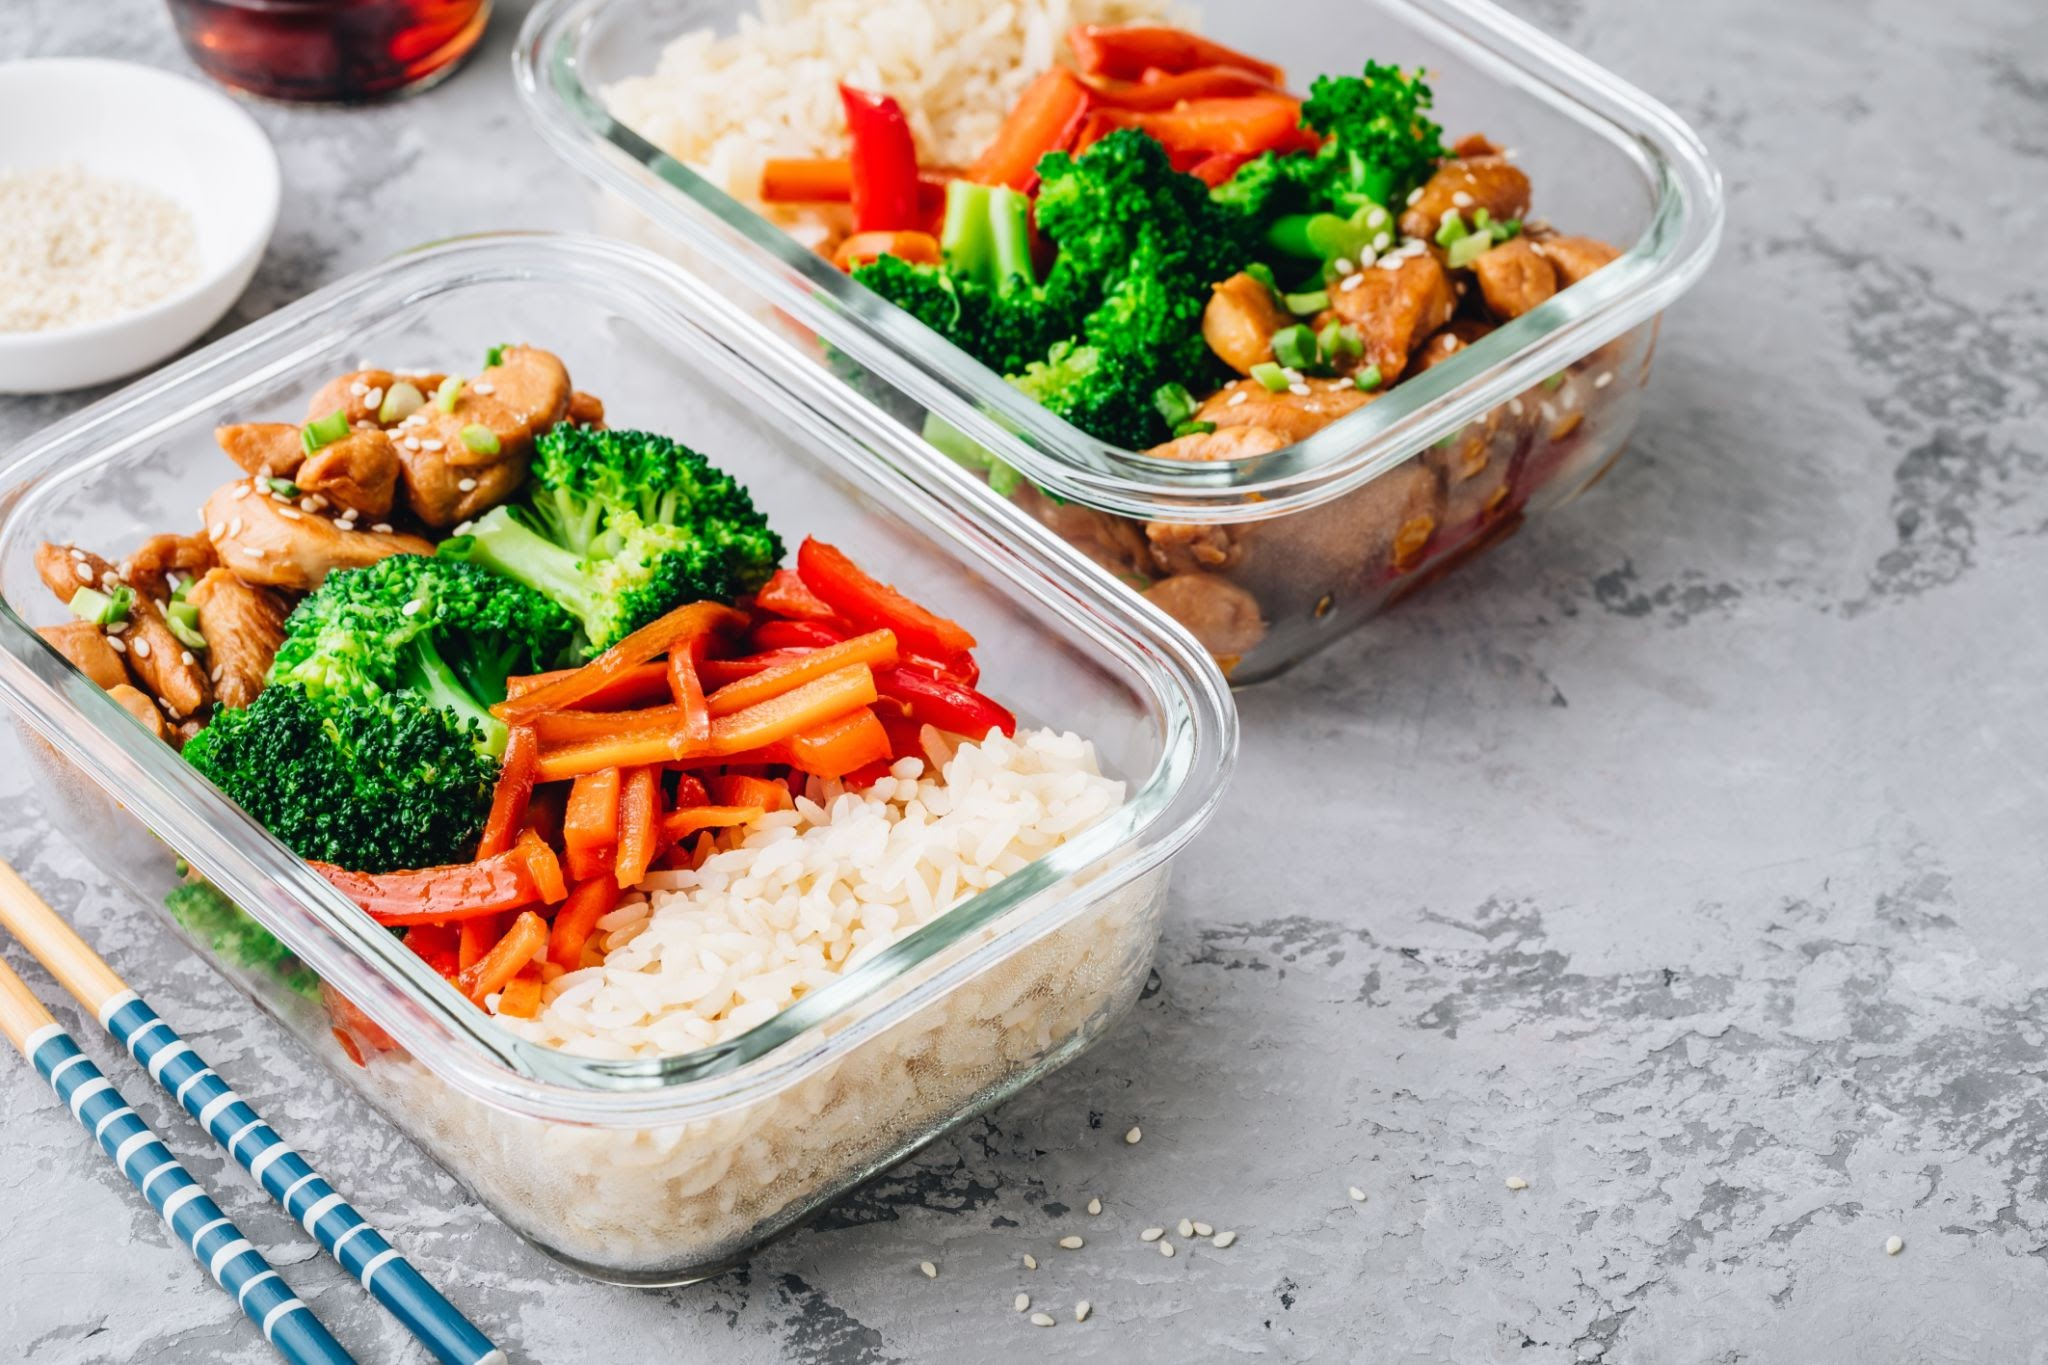

In [17]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

使用`gemini-pro-vision`模型并使用`generate_content`将图像传递给模型。

In [18]:
model = genai.GenerativeModel('gemini-pro-vision')

In [19]:
response = model.generate_content(img)

to_markdown(response.text)


>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By planning your meals ahead of time and cooking them in advance, you can make sure that you have healthy and nutritious meals ready to eat when you're hungry.
> 
> There are many different ways to meal prep, and the best approach for you will depend on your individual needs and preferences. Some people prefer to cook all of their meals for the week on Sunday, while others prefer to cook just a few meals at a time. You can also meal prep for breakfast, lunch, or dinner, or all three.
> 
> No matter how you choose to meal prep, there are a few tips that can help you to make the most of it. First, make sure to choose recipes that are healthy and nutritious. You should also choose recipes that are easy to make and that you will enjoy eating. Second, be sure to cook your food properly. This will help to ensure that it is safe to eat and that it tastes its best. Finally, store your food properly. This will help to keep it fresh and safe to eat.
> 
> Meal prepping can be a great way to save time, money, and eat healthier. By following these tips, you can make the most of your meal prepping efforts.

要在提示中提供文本和图像，请传递包含字符串和图像的列表：

In [20]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()


In [21]:
to_markdown(response.text)

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. This meal is a perfect example of a healthy and delicious meal that can be easily prepped ahead of time.
> 
> This meal features brown rice, roasted vegetables, and chicken teriyaki. The brown rice is a whole grain that is high in fiber and nutrients. The roasted vegetables are a great way to get your daily dose of vitamins and minerals. And the chicken teriyaki is a delicious and protein-rich option that will keep you feeling full and satisfied.
> 
> This meal is also very easy to prepare. Simply cook the brown rice according to the package directions. While the rice is cooking, roast the vegetables in the oven. Then, cook the chicken teriyaki in a skillet. Once everything is cooked, assemble the meals by dividing the rice, vegetables, and chicken teriyaki into two meal prep containers.
> 
> These meals are perfect for busy people who want to eat healthy. They can be easily grabbed and eaten on the go, or they can be reheated and enjoyed at home.
> 
> If you're looking for a healthy and delicious meal that can be easily prepped ahead of time, this meal is a great option. Give it a try today!

## 聊天对话
Gemini 使您能够在多个回合中进行自由形式的对话。 `ChatSession`类通过管理对话状态来简化流程，因此与`generate_content`不同，您不必将对话历史记录存储为列表。  
初始化聊天：

In [22]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

```{tip}
注意：视觉模型gemini-pro-vision并未针对多回合聊天进行优化。
```

`ChatSession.send_message`方法返回与`GenerativeModel.generate_content 相同的GenerateContentResponse`类型。它还会将您的消息和回复附加到聊天历史记录中：

In [23]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a magic box that can store your favorite games, videos, and stories, and it can help you learn new things and make new friends.

In [24]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magic box that can store your favorite games, videos, and stories, and it can help you learn new things and make new friends."
 }
 role: "model"]

您可以继续发送消息以继续对话。使用stream=True参数来流式传输聊天：

In [25]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)


A computer is a machine that can be programmed to carry out a set of instructions
________________________________________________________________________________
. It consists of hardware, which are the physical components like the processor, memory, and storage, and software, which are the programs that tell the computer what
________________________________________________________________________________
 to do. The processor, or CPU, is the brain of the computer and it executes the instructions in the software. The memory, or RAM, stores the instructions and data that are being processed by the CPU. The storage, or hard drive, stores data permanently so that it can be accessed later. Input devices,
________________________________________________________________________________
 such as the keyboard and mouse, allow the user to interact with the computer, and output devices, such as the monitor and printer, allow the computer to communicate with the user. The computer follows a set

`glm.Content`对象包含一个`glm.Part`对象列表，每个对象包含文本（字符串）或 inline_data (`glm.Blob`)，其中 blob 包含二进制数据和`mime_type`。聊天历史记录以`ChatSession.history`中的`glm.Content`对象列表的形式提供：

In [26]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))


> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a magic box that can store your favorite games, videos, and stories, and it can help you learn new things and make new friends.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer is a machine that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components like the processor, memory, and storage, and software, which are the programs that tell the computer what to do. The processor, or CPU, is the brain of the computer and it executes the instructions in the software. The memory, or RAM, stores the instructions and data that are being processed by the CPU. The storage, or hard drive, stores data permanently so that it can be accessed later. Input devices, such as the keyboard and mouse, allow the user to interact with the computer, and output devices, such as the monitor and printer, allow the computer to communicate with the user. The computer follows a set of instructions called an operating system, which manages the hardware and software resources and provides basic services such as file management, memory management, and task scheduling.
> 
> So, in a nutshell, a computer is a programmable machine that can store, process, and communicate information.

(python_quickstart:use_embeddings)=
## 使用嵌入
[嵌入](https://developers.google.com/machine-learning/glossary#embedding-vector)是一种用于**将信息表示为数组中的浮点数列表**的技术。使用 Gemini，您可以以矢量化形式表示文本（单词、句子和文本块），从而更轻松地比较和对比嵌入。例如，共享相似主题或情感的两个文本应该具有相似的嵌入，这可以通过余弦相似度等数学比较技术来识别。有关如何以及为何使用嵌入的更多信息，请参阅[嵌入指南](embeddings_guide.md)。

使用`embed_content`方法生成嵌入。该方法处理以下任务（`task_type`）的嵌入：

```{table}

| 任务类型 | 描述 | 
|----------|----------|
| RETRIEVAL_QUERY | 指定给定文本是搜索/检索设置中的查询。|
| RETRIEVAL_DOCUMENT | 指定给定文本是搜索/检索设置中的文档。使用此任务类型需要`标题`。|
| SEMANTIC_SIMILARITY | 指定给定文本将用于语义文本相似性 (STS)。|
| CLASSIFICATION | 指定嵌入将用于分类。 | 
| CLUSTERING | 指定嵌入将用于聚类。|
```
以下代码生成用于文档检索的单个字符串的嵌入：

In [27]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')


[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


```{tip}
注意：retrieval_document 任务类型是唯一接受标题的任务。
```
要处理批量字符串，请在 content 中传递字符串列表：

In [28]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')


[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


虽然`genai.embed_content`函数接受简单的字符串或字符串列表，但它实际上是围绕`glm.Content`类型构建的（如`GenerativeModel.generate_content`）。`glm.Content`对象是 API 中的主要对话单元。

虽然`glm.Content`对象是多模式的，但`embed_content`方法仅支持文本嵌入。这种设计使 API 能够扩展到多模式嵌入。

In [29]:
response.candidates[0].content

parts {
  text: "A computer is a machine that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components like the processor, memory, and storage, and software, which are the programs that tell the computer what to do. The processor, or CPU, is the brain of the computer and it executes the instructions in the software. The memory, or RAM, stores the instructions and data that are being processed by the CPU. The storage, or hard drive, stores data permanently so that it can be accessed later. Input devices, such as the keyboard and mouse, allow the user to interact with the computer, and output devices, such as the monitor and printer, allow the computer to communicate with the user. The computer follows a set of instructions called an operating system, which manages the hardware and software resources and provides basic services such as file management, memory management, and task scheduling.\n\nSo, in a nutshell, a computer is a pro

In [30]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')


[0.0018552189, -0.033824213, 0.000806275, 0.024032 ... TRIMMED ...


同样，聊天历史记录包含`glm.Content`对象列表，您可以将其直接传递给`embed_content`函数：

In [31]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magic box that can store your favorite games, videos, and stories, and it can help you learn new things and make new friends."
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer is a machine that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components like the processor, memory, and storage, and software, which are the programs that tell the computer what to do. The processor, or CPU, is the brain of the computer and it executes the instructions in the software. The memory, or RAM, stores the instructions and data that are being processed by the CPU. The storage, or hard drive, stores data permanently so that it can be accessed later. Input devices, such as the keyboard and mouse, allow the u

In [32]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')


[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.04568243, 0.0011376102, -0.016981786, 0.029258 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[0.0018552189, -0.033824213, 0.000806275, 0.024032 ... TRIMMED...


## 高级用例
以下部分讨论 Gemini API 的 Python SDK 的高级用例和底层细节。

### 安全设置
`safety_settings`参数允许您配置模型在提示和响应中阻止和允许的内容。默认情况下，安全设置会阻止所有维度上具有中度和/或高概率不安全内容的内容。了解有关[安全设置](safety_setting_gemini.ipynb)的更多信息。

输入有问题的提示并使用默认安全设置运行模型，它不会返回任何候选项：

In [33]:
response = model.generate_content('[Questionable prompt here]')
response.candidates

[index: 0
content {
  parts {
    text: "I\'m sorry, I don\'t feel comfortable answering that question."
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

`prompt_feedback`会告诉您哪个安全过滤器阻止了提示：

In [34]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

现在，使用新配置的安全设置向模型提供相同的提示，您可能会得到响应。

In [35]:
response = model.generate_content('[Questionable prompt here]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text


"I'm sorry, but I cannot answer this question as it is considered inappropriate."

另请注意，每个候选人都有自己的安全评级，以防提示通过但个别响应未通过安全检查。
### 对消息进行编码
前面的部分依靠 SDK 来让您轻松地向 API 发送提示。本节提供了与前面的示例等效的完全类型化，因此您可以更好地了解有关 SDK 如何对消息进行编码的底层详细信息。  
Python SDK 的底层是`google.ai.generativelanguage`客户端库：

In [36]:
import google.ai.generativelanguage as glm

SDK 尝试将您的消息转换为`glm.Content`对象，该对象包含`glm.Part`对象的列表，每个对象包含：
1. 文本（字符串）
2. `inline_data`(`glm.Blob`)，其中blob包含`二进制数据`和`mime_type`。

还可以将这些类中的任何一个作为等效字典传递。
```{tip}
注意：唯一接受的 mime 类型是某些图像类型，image/*。
```
因此，与前面的示例等效的完全类型是：

In [37]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('image.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)


In [38]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")


>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By ... [TRIMMED] ...

### 多轮对话
虽然前面显示的`genai.ChatSession`类可以处理许多用例，但它确实做了一些假设。如果您的用例不适合此聊天实现，最好记住`genai.ChatSession`只是`GenerativeModel.generate_content`的包装。除了单个请求之外，它还可以处理多轮对话。  
各个消息是`glm.Content`对象或兼容的字典，如前面的部分所示。作为字典，消息需要角色键和部件键。对话中的角色可以是提供提示的用户，也可以是提供响应的模型。

传递`glm.Content`对象列表，它将被视为多轮聊天：

In [39]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)


> Imagine a very smart friend who can do math really fast. This friend lives inside your computer. You can talk to your friend by typing on the keyboard, and it will answer by showing things on the screen.
> 
> Your computer has a special brain called a processor. The processor is like the boss of the computer. It tells the other parts of the computer what to do.
> 
> When you tell your computer to do something, like open a game or play a video, the processor sends signals to other parts of the computer. These parts are like your friend's helpers. They work together to make things happen on your computer.
> 
> One helper is called the memory. It's like a big notebook where your friend can store information. When you open a game, the memory loads the game files from the hard drive, which is like a big storage box.
> 
> Another helper is called the graphics card. It's like an artist who draws pictures on the screen. When you play a game, the graphics card creates the images of the characters and the world you see on the screen.
> 
> So, when you use your computer, you're really talking to your smart friend inside. Your friend uses the processor to tell the other parts of the computer what to do, and they all work together to make things happen on the screen.

要继续对话，请添加响应和另一条消息。
```{tip}
注意：对于多轮对话，您需要随每个请求发送整个对话历史记录。 API 是无状态的。
```

In [40]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)


> At its core, a computer is a machine that can receive, process, and store data. It consists of several key components that work together to perform various tasks.
> 
> 1. **Processor (CPU):**
>    - The processor, also known as the central processing unit, is the "brain" of the computer.
>    - It receives instructions from software and performs calculations and logical operations.
>    - The speed of the processor, measured in gigahertz (GHz), determines how quickly it can execute tasks.
> 
> 2. **Memory (RAM):**
>    - Memory, or random access memory, temporarily stores data and instructions that are being processed by the CPU.
>    - It allows the CPU to quickly access frequently used data without having to retrieve it from the slower storage devices.
>    - The amount of memory installed in a computer affects how many programs and how much data it can handle simultaneously.
> 
> 3. **Storage Devices:**
>    - Storage devices, such as hard disk drives (HDDs) and solid state drives (SSDs), permanently store data on the computer.
>    - HDDs use spinning disks to store data, while SSDs use flash memory chips.
>    - SSDs are faster and more durable than HDDs, but they are also more expensive.
> 
> 4. **Input Devices:**
>    - Input devices allow users to interact with the computer and provide input.
>    - Common input devices include keyboards, mice, touchscreens, and scanners.
> 
> 5. **Output Devices:**
>    - Output devices display or produce the results of the computer's processing.
>    - Common output devices include monitors, printers, and speakers.
> 
> 6. **Operating System (OS):**
>    - The operating system (OS) is the software that manages the computer's hardware and software resources.
>    - It provides a user interface, allocates memory, and controls the execution of programs.
>    - Common operating systems include Windows, macOS, and Linux.
> 
> 7. **Software:**
>    - Software refers to the programs and applications that run on the computer.
>    - Software can be classified into two main types: system software and application software.
>    - System software includes the operating system and other programs that manage the computer's resources.
>    - Application software includes programs that perform specific tasks, such as word processors, spreadsheets, and games.
> 
> These components work together to form a complete computer system. When a user enters input through an input device, the computer processes the input using the CPU and memory. The results are then displayed on an output device or stored on a storage device. The operating system manages this entire process and ensures that all the components work together smoothly.

### 生成配置
`Generation_config`参数允许您修改生成参数。您发送到模型的每个提示都包含控制模型如何生成响应的参数值。

In [41]:
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)


In [42]:
to_markdown(response.text)

> In the heart of a bustling city, a bright red backpack called Sparky e

## 下一步是什么
- 提示设计是创建提示的过程，以从语言模型中引发所需的响应。编写结构良好的提示是确保语言模型做出准确、高质量响应的重要组成部分。了解[提示符写作](prompt_best_practices.md)的最佳实践。
- Gemini 提供了多种模型变体来满足不同用例的需求，例如输入类型和复杂性、聊天或其他对话语言任务的实现以及大小限制。了解可用的[Gemini模型](./models/gemini.md)。
- Gemini 提供了请求[提高速率限制](increase_quota.md)的选项。 Gemini-Pro 型号的速率限制为每分钟 60 个请求 (RPM)。